<img src="https://github.com/abolfazldelavar/dyrun/blob/main/logo.png?raw=true" align="right" width="250" alt="header pic"/>

# DYNAMIC RUNNER
**Dynamic Runner** or `dyrun` is a simple tool that facilitates simulations expeditiously and effortlessly, using invaluable instruments for modeling linear and nonlinear dynamic systems, irrespective of their time dependence or independence. This formidable instrument is capable of executing **dynamic mathematical models** and is advantageous for control engineering applications, estimation, and prediction. Moreover, it is applicable to Machine Learning and AI domains, including neural networks. Researchers who wish to delve into the realm of dynamic and control systems will find this package to be an invaluable resource. Enjoy!

https://github.com/abolfazldelavar/dyrun

"*Successful people are those who can build solid foundations with the bricks others throw at them.*"


## Requirements
All external **dependencies** utilized in the project should be documented in this section. To ensure comprehensive access to libraries, any additional libraries can be added as objects (using `struc()`) for improved control and management. Additionally, the `core_library.py` file contains two libraries, `clib` and `plib`, which provide a variety of useful functions for tasks such as drawing.

In [1]:
# Dependencies
from core.lib.required_libraries import *
from core.lib.core_library import *
from core.caller.scope_engine import *
from blocks.general_blocks import *

<Figure size 432x288 with 0 Axes>

In [2]:
# Simulation identification number
ID = Clib.get_now()
# Set the time simulation starts
simulation_start_time = Clib.set_timer(ID)

--- DYNAMIC RUNNER PACKAGE ---
The simulation with ID=20240710161421 has kicked off! (2024/07/10, 16:14:21)


## Custom Functions
If you need to define any custom functions for your project, this is the ideal location to do so. This section serves as a repository for pre-defined functions that can be accessed and utilized throughout the entire project.

In [3]:
def test():
    '''
    DocString `is` a text to help using this function.
    '''
    pass

## Parameters
This segment confers the prerogative to establish **invariable** quantities, typically employed with a singular value throughout the entire project. It is imperative to note that they must be delineated as a component of the `params` variable, which constitutes a `struct` collection.

In [4]:
params = Structure()

# Simulation Identification Carrier
params.id = ID

# Set the time-step and simulation time as needed.
# Note: These variables may need to be changed arbitrarily.
params.step = 0.0001 # (double)
params.t_final = 3 # (double)

# Calculate the number of steps required for the simulation.
# Note: This variable is dependent on the time-step and simulation time, and should not be changed.
params.n = int(params.t_final/params.step) # (DEPENDENT)

# Specify the folders for input data, output data, and logs.
params.data_path = 'data'
params.load_path = params.data_path + '/inputs' # (string)
params.save_path = params.data_path + '/outputs' # (string)

# To save data regularly - time must be in second
params.auto_save_time = False # (sec)

# Determine whether to save data with a unique name based on the time of saving.
params.unique = False # (logical)

# Specify the default image format for saving.
# Note: Allowed formats are "jpg", "png", and "pdf".
params.default_image_format = 'png' # (string)

# Add any additional parameters as needed ~~~>

## Signals
This section is designated for the definition of any signals and array variables.

In [5]:
signals = Structure()
# Generate a time vector for the simulation using the specified time-step and simulation time.
signals.time_line = np.arange(0, params.t_final, params.step)
# Insert signal data here ~~~>

## Models
Dynamic objects and those that are not as elementary as an array must be delineated as a component of the `models` variable. This includes objects such as estimators and controllers.

In [6]:
models = Structure()
# Add your desired models to the struct ~~~>

models.plant = NonSys1(signals.time_line)
models.identifier = NeuroIdentifier(models.plant,
                                    params.step,
                                    x_0 = models.plant.initial_states,
                                    L = 5,
                                    w_m = 1e3,
                                    eps = 0.2,
                                    k = 800,
                                    alpha = 300,
                                    gamma = 5,
                                    beta = 0.2,
                                    pi_w = 0.1*np.eye(6),
                                    pi_v = 0.1*np.eye(2))
models.identifier

"Nonlinear System 1" was created.
"Neuro Identifier" was created.


## Main
### Oscilloscope set up
Firstly, `scope` objects that are instrumental in observing signals should be defined herein.

In [7]:
# Insert signal trackers here ~~~>
sc_x_h = Scope(time_line = signals.time_line, n_signals = models.identifier.n_states)
sc_dx_h = sc_x_h.dc()
sc_z = sc_x_h.dc()


### Auto save option
To warranty your data against any interruptions, use the below function to save your data periodically, automatically. The `params.auto_save_time` in params devotes the duration of this period which is `False` as default.

In [8]:
def auto_save_data(params, signals, models):
    # Put your save operation here ~~~>
    
    # Schedule the next save operation
    Clib.diary('Auto-saving funtion ran successfully.', no_print=True)
    global _save_timer
    _save_timer = threading.Timer(params.auto_save_time, auto_save_data, args=[params, signals, models])
    _save_timer.start()

### Simulation
The principal function of the project, indubitably, can be identified as the `simulation` function delineated below. In this segment, given the accessibility of all variables (`params`, `signals`, and `models`), you possess the capability to code the primary objective of this project herein. It is imperative to note that there exists a loop entitled `Main loop`, which can be employed as a time step loop, albeit its utilization may not be requisite in numerous projects.

In [9]:
def simulation(params, signals, models):
    # This function is the main code for your simulation,
    # containing a time-loop and utilizing model blocks and signals.
    # The order of the input parameters should be (Parameters, Signals, Models).
    
    ## Initial options
    if params.auto_save_time != False: auto_save_data(params, signals, models)
    
    ## Main loop
    for k in tqdm(range(0, params.n), dynamic_ncols=True, leave=True, desc='Progress'):
        # Put your codes here ~~~>
        u = -(2 + np.math.cos(2*models.plant.states[0,k]))*models.plant.states[1,k]
        models.plant(u)
        models.identifier(u, models.plant.states[:, k])
        
        # Storing data
        sc_x_h.get(models.identifier.x_h)
        sc_dx_h.get(models.identifier.dx_h)
        sc_z.get(models.identifier.z)
        

    ## Finalize options
    if params.auto_save_time != False: _save_timer.cancel()
    # Return the output as a list of params, signals, models
    return [params, signals, models]

## Execution
To run the project, the subsequent code snippet is furnished. In elementary projects, a single execution may suffice, whereas, in more intricate ones, multiple simulations may be necessitated. To accomplish this, loops and other discretionary techniques can be employed to invoke the `simulation` function with altered inputs such as `params`, etc.

In [10]:
# Executaion
[params, signals, models] = simulation(params, signals, models)

# The total time will be reported
Clib.end_report(simulation_start_time)

Progress: 100%|██████████| 30000/30000 [01:03<00:00, 471.38it/s]

The simulation has been completed. (1 minutes and 5.3186 seconds)


## Illustration
Should you necessitate the exhibition of the results procured, this section can be employed to facilitate superior organization.

In [11]:
## Initialize the variables and parameters
n = params.n # number of elements
n_line = np.arange(0, n) # create a vector from 0 to n-1
tLine = signals.time_line[n_line] # create a time-line vector with length n
Plib.initialize() # initialize the library
## Write your codes here ~~~>

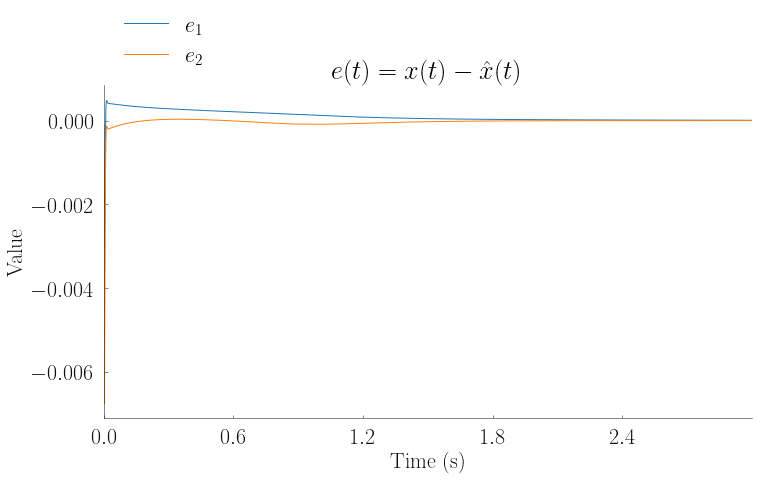

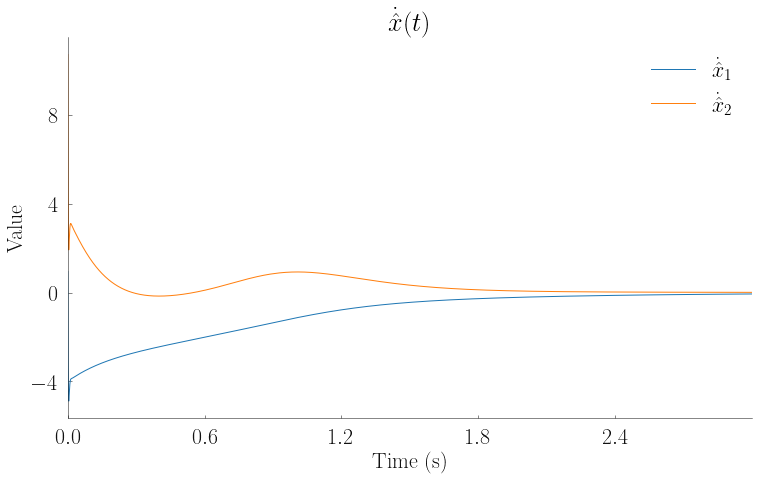

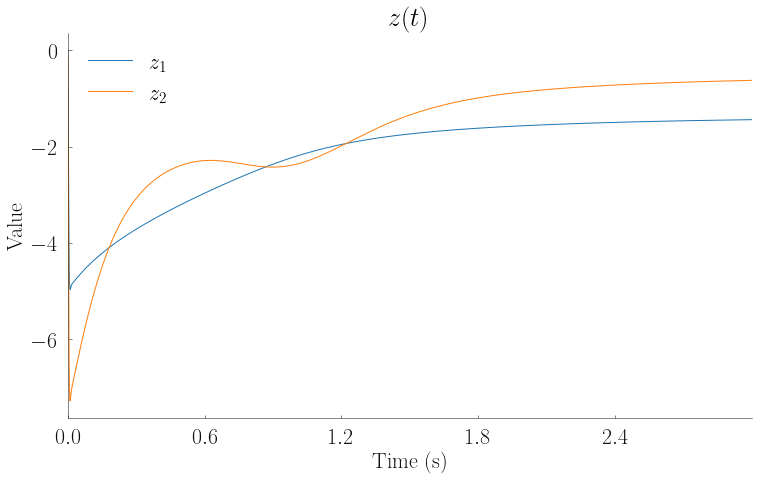

In [12]:
sc_x = Scope(time_line = signals.time_line, initial = models.plant.states[:, 0:-1])
sc_e_x = sc_x - sc_x_h
sc_e_x.show(params, line_width = 1,
            title = '$e(t)=x(t)-\hat x(t)$',
            y_label = 'Value',
            legend = ('$e_1$', '$e_2$'))
sc_dx_h.show(params, line_width = 1,
            title = r'$\dot{\hat{x}}(t)$',
            y_label = 'Value',
            legend = ('$\dot{\hat{x}}_1$', '$\dot{\hat{x}}_2$'))
sc_z.show(params, line_width = 1,
            title = r'$z(t)$',
            y_label = 'Value',
            legend = ('$z_1$', '$z_2$'))

In [13]:
models.identifier

## Preservation
Utilize the subsequent section to store data.

In [14]:
## Write your codes here ~~~>
